In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\jayas\Downloads\retail_sales_dataset.csv")

In [3]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          200 non-null    object 
 1   CustomerName     200 non-null    object 
 2   ProductCategory  200 non-null    object 
 3   Quantity         200 non-null    int64  
 4   UnitPrice        190 non-null    float64
 5   OrderDate        190 non-null    object 
 6   PaymentMethod    127 non-null    object 
 7   Region           200 non-null    object 
 8   TotalAmount      200 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 14.2+ KB


In [5]:
missing_values = df.isnull().sum()
missing_values

OrderID             0
CustomerName        0
ProductCategory     0
Quantity            0
UnitPrice          10
OrderDate          10
PaymentMethod      73
Region              0
TotalAmount         0
dtype: int64

In [6]:
most_missing_col = missing_values.idxmax()
most_missing_col

'PaymentMethod'

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df['Region'].unique()

array(['North', 'Est', 'West', 'Soth', 'Noth', 'South', 'East'],
      dtype=object)

In [10]:
df['Region'] = df['Region'].replace({'Est':'East'})
df['Region'] = df['Region'].replace({'Soth':'South'})
df['Region'] = df['Region'].replace({'Noth':'North'})
df

,OrderID,CustomerName,ProductCategory,Quantity,UnitPrice,OrderDate,PaymentMethod,Region,TotalAmount
0,ORD1000,Kiran,Sports,4,50.0,2023-08-08,NaN,North,514.0
1,ORD1001,Bob,Clothing,1,NaN,2023-03-10,UPI,East,0.0
2,ORD1002,Tina,Electronics,8,50.0,2023-02-16,Wallet,North,400.0
3,ORD1003,Liam,Electrnics,5,100.0,2023-04-04,NaN,East,500.0
4,ORD1004,Tina,Clothng,2,200.0,2023-08-26,Wallet,West,400.0
...,...,...,...,...,...,...,...,...,...
195,ORD1195,Grace,Electrnics,6,100.0,2023-03-21,NaN,West,600.0
196,ORD1196,Frank,Sports,2,50.0,2023-08-01,Wallet,South,100.0
197,ORD1197,kiran,Clothing,-2,50.0,2023-07-22,Wallet,South,-100.0
198,ORD1198,Bob,Sports,0,200.0,2023-09-09,UPI,East,0.0


In [11]:
median_price = df.groupby('ProductCategory')['UnitPrice'].transform('median')
median_price.fillna(median_price)

0      100.0
1      100.0
2      100.0
3       50.0
4      100.0
       ...  
195     50.0
196    100.0
197    100.0
198    100.0
199     50.0
Name: UnitPrice, Length: 200, dtype: float64

In [12]:
df['PaymentMethod'] = df['PaymentMethod'].fillna('Unknown')
df['PaymentMethod'].unique()

array(['Unknown', 'UPI', 'Wallet', 'Cash', 'Credit Card'], dtype=object)

In [13]:
df=df[(df['Quantity'] >=0)& (df['UnitPrice']>0)]
df

,OrderID,CustomerName,ProductCategory,Quantity,UnitPrice,OrderDate,PaymentMethod,Region,TotalAmount
0,ORD1000,Kiran,Sports,4,50.0,2023-08-08,Unknown,North,514.0
2,ORD1002,Tina,Electronics,8,50.0,2023-02-16,Wallet,North,400.0
3,ORD1003,Liam,Electrnics,5,100.0,2023-04-04,Unknown,East,500.0
4,ORD1004,Tina,Clothng,2,200.0,2023-08-26,Wallet,West,400.0
5,ORD1005,ivy,Clothing,4,50.0,2023-07-23,Unknown,North,200.0
...,...,...,...,...,...,...,...,...,...
194,ORD1194,Kiran,Home,8,200.0,2023-05-29,UPI,North,1600.0
195,ORD1195,Grace,Electrnics,6,100.0,2023-03-21,Unknown,West,600.0
196,ORD1196,Frank,Sports,2,50.0,2023-08-01,Wallet,South,100.0
198,ORD1198,Bob,Sports,0,200.0,2023-09-09,UPI,East,0.0


In [14]:
df = df.copy()
df['Total Amount'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'Total Amount']].head(5)

,Quantity,UnitPrice,Total Amount
0,4,50.0,200.0
2,8,50.0,400.0
3,5,100.0,500.0
4,2,200.0,400.0
5,4,50.0,200.0


In [15]:
df[["Quantity", "UnitPrice", "Total Amount"]].describe()

,Quantity,UnitPrice,Total Amount
count,165.000000,165.000000,165.000000
mean,4.975758,734.242424,4569.878788
std,2.915375,2364.409675,16902.623551
min,0.000000,20.000000,0.000000
25%,2.000000,50.000000,120.000000
50%,5.000000,100.000000,400.000000
75%,7.000000,200.000000,900.000000
max,9.000000,10000.000000,90000.000000


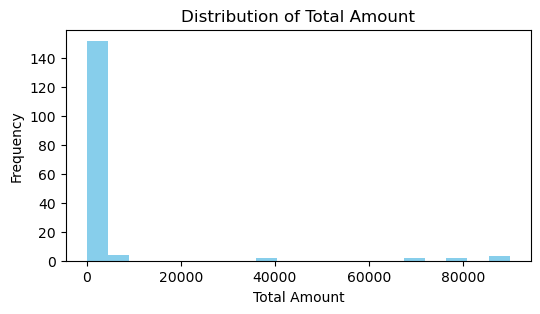

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,3))
plt.hist(df['Total Amount'], bins=20, color = 'skyblue')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

In [20]:
avg_sales_by_category = df.groupby("ProductCategory")[["Total Amount"]].sum()
avg_sales_by_category.sort_values(by = "Total Amount", ascending = False)
avg_sales_by_category

,Total Amount
ProductCategory,
Clothing,18010.0
Clothng,20480.0
Electrnics,100790.0
Electronics,156250.0
Hme,216770.0
Home,51910.0
Sports,189820.0


<Figure size 500x200 with 0 Axes>

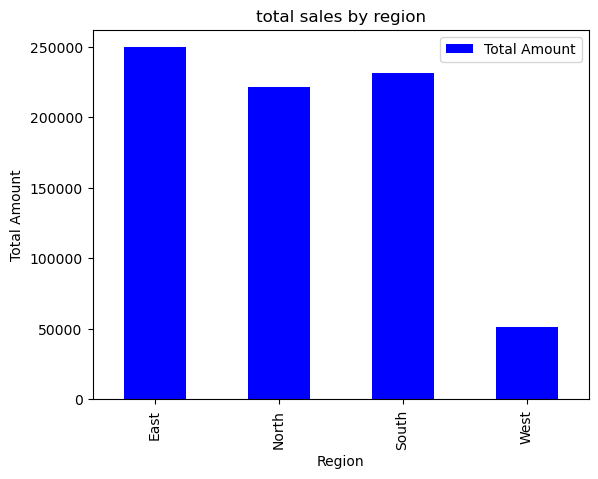

In [29]:
sales_by_region = df.groupby("Region")[["Total Amount"]].sum()
plt.figure(figsize = (5,2))
sales_by_region.plot(kind="bar", color = "blue")
plt.title('total sales by region')
plt.xlabel('Region')
plt.ylabel('Total Amount')
plt.show()

In [38]:
spending_customers = df.groupby("CustomerName")[["Total Amount"]].sum()
customers_top5=spending_customers.sort_values(by = "Total Amount", ascending = False).head(5)
customers_top5

,Total Amount
CustomerName,
Rita,161060.0
Tina,91700.0
Quinn,90390.0
Jack,89540.0
Eva,83710.0


In [44]:
frequently_used_payment = df.groupby("PaymentMethod")["Total Amount"].sum()
frequently_used_payment.sort_values(ascending= False)
frequently_used_payment

PaymentMethod
Cash           114180.0
Credit Card    185700.0
UPI            110380.0
Unknown        329310.0
Wallet          14460.0
Name: Total Amount, dtype: float64

In [45]:
corelation_matrix = df[["Quantity", "UnitPrice", "Total Amount"]].corr()
corelation_matrix

,Quantity,UnitPrice,Total Amount
Quantity,1.000000,0.133764,0.243165
UnitPrice,0.133764,1.000000,0.911650
Total Amount,0.243165,0.911650,1.000000


In [56]:
best_selling_product = df.groupby(["Region", "ProductCategory"])["Total Amount"].sum()
best_selling_product.sort_values(ascending = False)
best_selling_product.head(5)

Region  ProductCategory
East    Clothing            3740.0
        Clothng             2240.0
        Electrnics          2500.0
        Electronics        81300.0
        Hme                73900.0
Name: Total Amount, dtype: float64

In [61]:
high_number_orders= df.groupby("Region")[["OrderID"]].nunique()
high_number_orders.sort_values(by = "Region", ascending = False)
high_number_orders.head(5)

,OrderID
Region,
East,42
North,52
South,46
West,25
